## Analysis of feature selection for cell line mutation prediction; single-cancer holdouts

This script is very similar to `02_cancer_type_classification/plot_univariate_fs_results.ipynb`, for analyzing the results of purity prediction on held-out cancer types. We analyze the same 3 types of data splitting experiments here:

* "Train single cancer": train and test on the same individual cancer type
* "Train pan-cancer": train on the test cancer type + all other valid TCGA cancer types
* "Train all other cancers": train on all other valid TCGA cancer types (without the test cancer type in the training set)

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

%load_ext autoreload
%autoreload 2

In [2]:
# analysis of results generated by script:
# 07_purity_prediction/run_purity_prediction.py
# (with varying feature_selection parameters)

single_cancer_dir = os.path.join('results', 'ccle_mutation_prediction', 'single_cancer')
pancancer_dir = os.path.join('results', 'ccle_mutation_prediction', 'pancancer')
pancancer_only_dir = os.path.join('results', 'ccle_mutation_prediction', 'all_other_cancers')

n_dims = [100, 1000, 5000]

# gene to plot results for
gene = 'TP53'

# metric to plot results for
metric = 'aupr'
delta_metric = 'delta_{}'.format(metric)

# location to save plots to
output_plots = True
if metric == 'auroc':
    output_plots_dir = cfg.ccle_fs_plots_dir / 'auroc'
else:
    output_plots_dir = cfg.ccle_fs_plots_dir

### Load results

We load the results of the single cancer, pan-cancer, and "pan-cancer only" (aka "all other cancers") experiments here.

In [3]:
single_cancer_df = au.load_prediction_results_fs(
    single_cancer_dir, cfg.fs_methods
)
single_cancer_df['train_set'] = 'single_cancer'

for n in n_dims:
    single_cancer_df.loc[
        (single_cancer_df.fs_method == 'mad') & (single_cancer_df.n_dims == n),
        'fs_method'
    ] = 'mad_{}'.format(n)

print(np.unique(single_cancer_df.seed))
print(np.unique(single_cancer_df.fs_method))
print(single_cancer_df.shape)
single_cancer_df.head()

[ 1 42]
['mad_100' 'mad_1000' 'mad_5000' 'median_f_test' 'pancan_f_test' 'random']
(14400, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,1.00000,1.00000,TP53,Bile_Duct,shuffled,1,train,0,mad_5000,5000,single_cancer
1,0.50000,0.66444,TP53,Bile_Duct,shuffled,1,test,0,mad_5000,5000,single_cancer
2,0.48366,0.69909,TP53,Bile_Duct,shuffled,1,cv,0,mad_5000,5000,single_cancer
3,0.50000,0.61538,TP53,Bile_Duct,shuffled,1,train,1,mad_5000,5000,single_cancer
4,0.50000,0.66667,TP53,Bile_Duct,shuffled,1,test,1,mad_5000,5000,single_cancer


In [4]:
pancancer_df = au.load_prediction_results_fs(
    pancancer_dir, cfg.fs_methods
)
pancancer_df['train_set'] = 'pancancer'

for n in n_dims:
    pancancer_df.loc[
        (pancancer_df.fs_method == 'mad') & (pancancer_df.n_dims == n),
        'fs_method'
    ] = 'mad_{}'.format(n)

print(np.unique(pancancer_df.seed))
print(np.unique(pancancer_df.fs_method))
print(pancancer_df.shape)
pancancer_df.head()

[ 1 42]
['mad_100' 'mad_1000' 'mad_5000' 'median_f_test' 'pancan_f_test' 'random']
(14400, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,0.99971,0.99986,TP53,Bile_Duct,shuffled,1,train,0,mad_5000,5000,pancancer
1,0.20000,0.56349,TP53,Bile_Duct,shuffled,1,test,0,mad_5000,5000,pancancer
2,0.53608,0.71497,TP53,Bile_Duct,shuffled,1,cv,0,mad_5000,5000,pancancer
3,1.00000,1.00000,TP53,Bile_Duct,shuffled,1,train,1,mad_5000,5000,pancancer
4,0.66667,0.88194,TP53,Bile_Duct,shuffled,1,test,1,mad_5000,5000,pancancer


In [5]:
pancancer_only_df = au.load_prediction_results_fs(
    pancancer_only_dir, cfg.fs_methods
)
pancancer_only_df['train_set'] = 'pancancer_only'

for n in n_dims:
    pancancer_only_df.loc[
        (pancancer_only_df.fs_method == 'mad') & (pancancer_only_df.n_dims == n),
        'fs_method'
    ] = 'mad_{}'.format(n)

print(np.unique(pancancer_only_df.seed))
print(np.unique(pancancer_only_df.fs_method))
print(pancancer_only_df.shape)
pancancer_only_df.head()

[ 1 42]
['mad_100' 'mad_1000' 'mad_5000' 'median_f_test' 'pancan_f_test' 'random']
(14400, 11)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,fs_method,n_dims,train_set
0,1.00000,1.00000,TP53,Bile_Duct,shuffled,1,train,0,mad_5000,5000,pancancer_only
1,0.85000,0.87667,TP53,Bile_Duct,shuffled,1,test,0,mad_5000,5000,pancancer_only
2,0.53669,0.71411,TP53,Bile_Duct,shuffled,1,cv,0,mad_5000,5000,pancancer_only
3,1.00000,1.00000,TP53,Bile_Duct,shuffled,1,train,1,mad_5000,5000,pancancer_only
4,0.72222,0.89683,TP53,Bile_Duct,shuffled,1,test,1,mad_5000,5000,pancancer_only


In [6]:
# get difference between true and shuffled models, split by
# feature selection method and holdout cancer type
def compare_from_experiment(experiment_df):
    compare_df = []
    for fs_method in experiment_df.fs_method.unique():
        for holdout_cancer_type in experiment_df.holdout_cancer_type.unique():
            compare_df.append(
                au.compare_control_ind(
                    experiment_df[
                        (experiment_df.fs_method == fs_method) &
                        (experiment_df.holdout_cancer_type == holdout_cancer_type)
                    ], metric=metric, verbose=True)
                  .assign(fs_method=fs_method,
                          holdout_cancer_type=holdout_cancer_type)
            )
    return pd.concat(compare_df)
    
single_cancer_compare_df = compare_from_experiment(single_cancer_df)
pancancer_compare_df = compare_from_experiment(pancancer_df)
pancancer_only_compare_df = compare_from_experiment(pancancer_only_df)

print(single_cancer_compare_df.shape,
      pancancer_compare_df.shape,
      pancancer_only_compare_df.shape)

(2400, 6) (2400, 6) (2400, 6)


In [7]:
single_cancer_compare_df.head()

,identifier,seed,fold,delta_aupr,fs_method,holdout_cancer_type
0,KRAS,1,0,0.37778,mad_5000,Bile_Duct
1,KRAS,1,1,0.15833,mad_5000,Bile_Duct
2,KRAS,1,2,0.06945,mad_5000,Bile_Duct
3,KRAS,1,3,0.07342,mad_5000,Bile_Duct
4,KRAS,42,0,0.22223,mad_5000,Bile_Duct


### Plot average performance across cancer types

In [8]:
print(single_cancer_compare_df.identifier.unique())

['KRAS' 'TP53' 'PTEN' 'BRAF' 'EGFR' 'PIK3CA' 'RB1']


In [9]:
print(single_cancer_compare_df.fs_method.unique())

['mad_5000' 'mad_100' 'median_f_test' 'pancan_f_test' 'random' 'mad_1000']


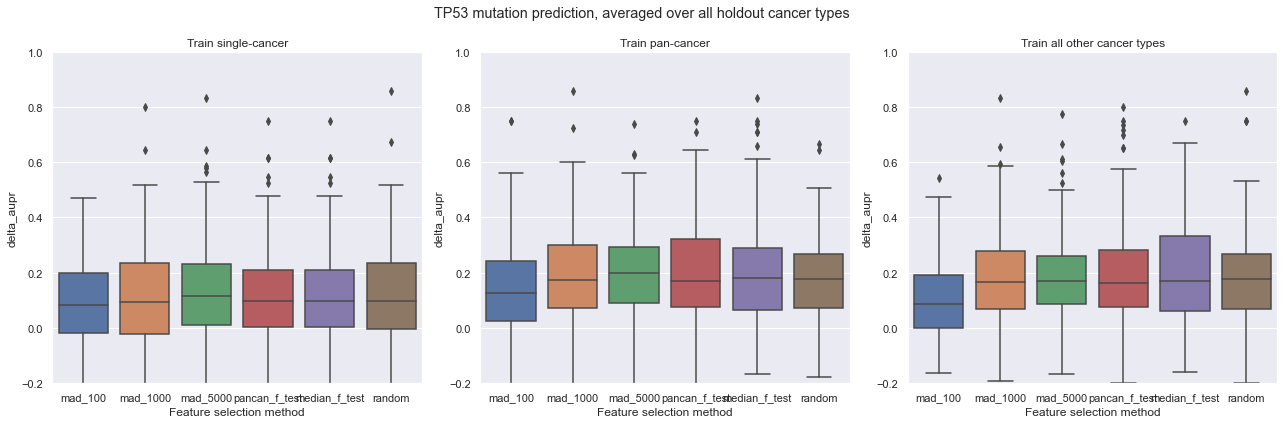

In [10]:
sns.set({'figure.figsize': (18, 6)})
sns.set_context('notebook')

fig, axarr = plt.subplots(1, 3)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

fs_method_order = [
    'mad_100',
    'mad_1000',
    'mad_5000',
    'pancan_f_test',
    'median_f_test',
    'random'
]


for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    # averaged over cancer types
    plot_df = compare_df[(compare_df.identifier == gene)]
    sns.boxplot(data=plot_df, x='fs_method', y=delta_metric,
                order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    ax.set_xlabel('Feature selection method')
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{} mutation prediction, averaged over all holdout cancer types'.format(gene))
plt.tight_layout()

if output_plots:
    output_plots_dir.mkdir(exist_ok=True)
    plt.savefig(output_plots_dir / '{}_all_summary.png'.format(gene),
                dpi=200, bbox_inches='tight')

In [11]:
# these are "non-carcinoma" cancer types in TCGA
# we anticipate that these will be the hardest to transfer models to (since
# most of TCGA, and thus most of our training set, is generally carcinomas),
# so it's valuable to look at results filtered only to these
non_carcinomas = [
    'Bone',
    'Brain',
    'Eye',
    'Leukemia',
    'Liposarcoma',
    'Lymphoma',
    'Myeloma',
    'Neuroblastoma',
    'Sarcoma',
    'Skin'
]

['Leukemia' 'Myeloma' 'Sarcoma' 'Brain' 'Bone' 'Lymphoma' 'Neuroblastoma'
 'Skin']


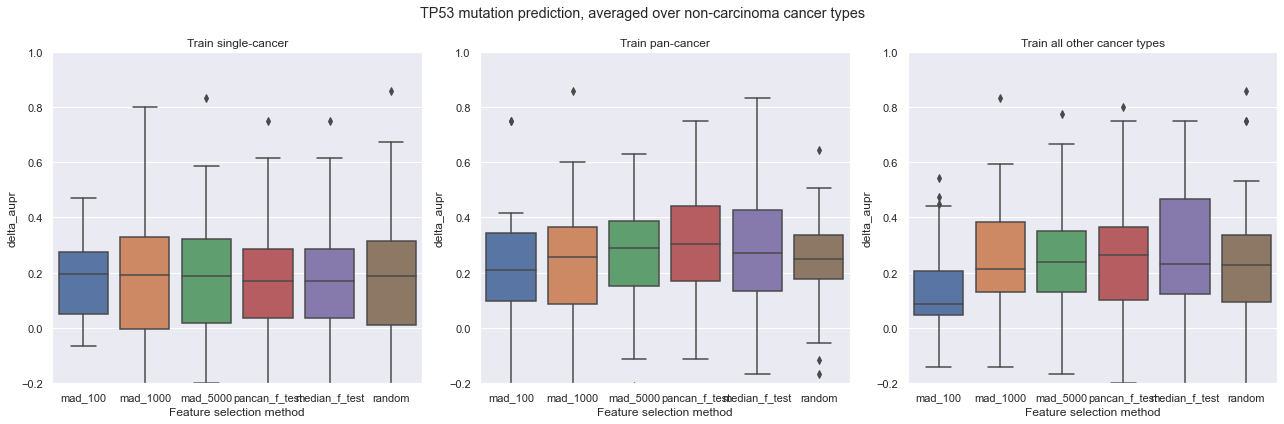

In [12]:
sns.set({'figure.figsize': (18, 6)})
sns.set_context('notebook')

fig, axarr = plt.subplots(1, 3)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]


for ix, compare_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    # averaged over non-carcinoma cancer types
    plot_df = compare_df[(compare_df.identifier == gene) & 
                         (compare_df.holdout_cancer_type.isin(non_carcinomas))]
    if ix == 0:
        # look at which cancer types are actually present in dataset
        print(plot_df.holdout_cancer_type.unique(), file=sys.stderr)
    sns.boxplot(data=plot_df, x='fs_method', y=delta_metric,
                order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    ax.set_xlabel('Feature selection method')
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{} mutation prediction, averaged over non-carcinoma cancer types'.format(gene))
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_non_carcinoma_summary.png'.format(gene),
                dpi=200, bbox_inches='tight')

### Plot performance broken down by cancer type

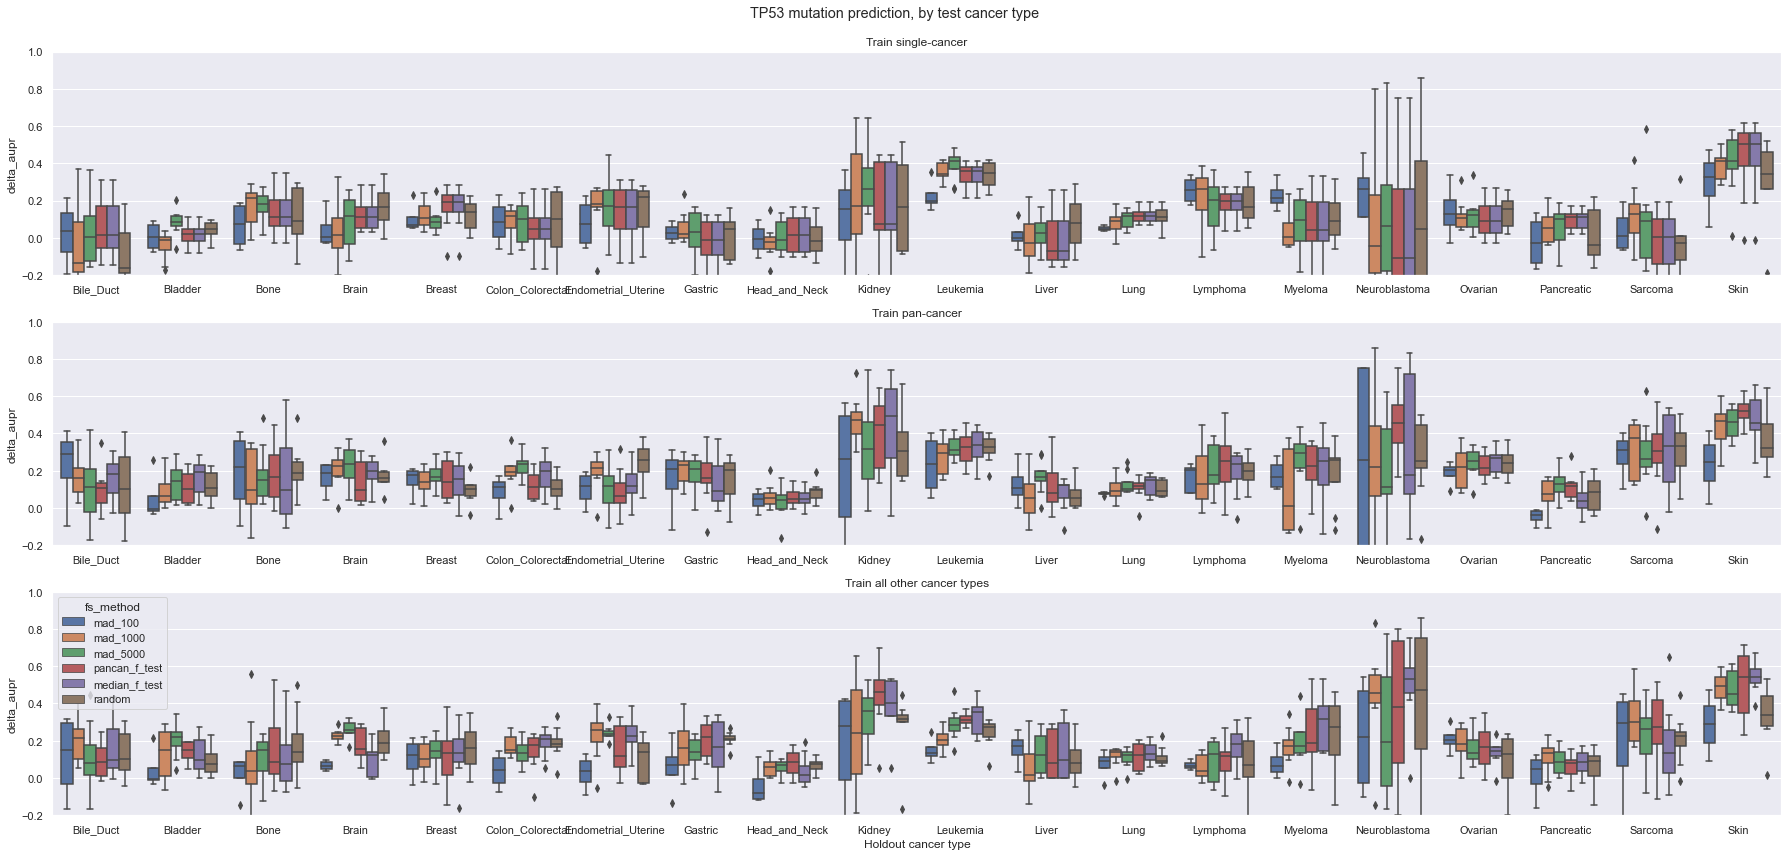

In [13]:
sns.set({'figure.figsize': (25, 12)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 1)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

# split individual cancer types
for ix, to_plot_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    plot_df = (
        to_plot_df[(to_plot_df.identifier == gene)]
          .sort_values(by='holdout_cancer_type')
    )
    sns.boxplot(data=plot_df, x='holdout_cancer_type', 
                y=delta_metric, hue='fs_method', 
                hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    if ix == len(dfs_to_plot) - 1:
        ax.set_xlabel('Holdout cancer type')
    else:
        ax.set_xlabel('')
        ax.get_legend().remove()
    ax.set_ylim(-0.2, 1)
    
plt.suptitle('{} mutation prediction, by test cancer type'.format(gene), y=0.99)
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_all_by_cancer_type.png'.format(gene),
                dpi=200, bbox_inches='tight')

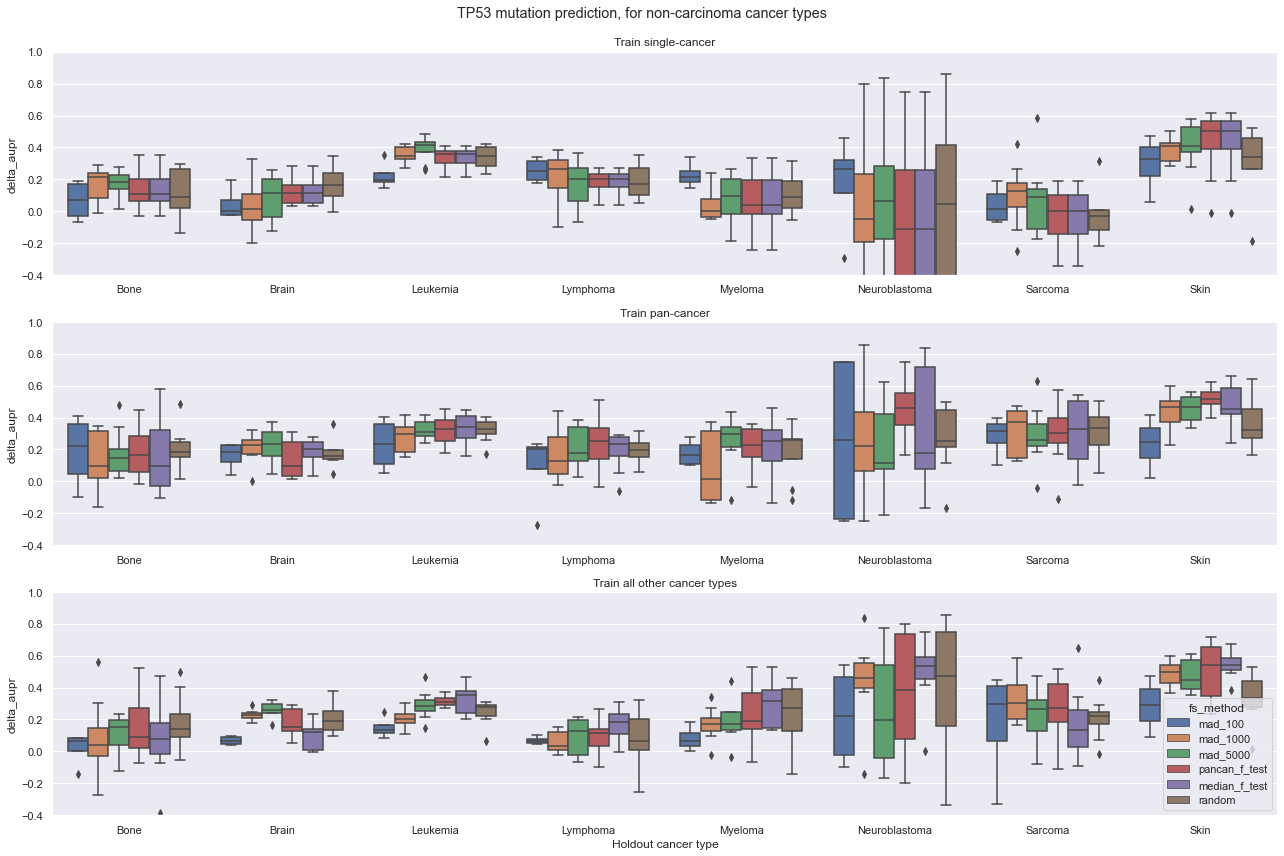

In [14]:
sns.set({'figure.figsize': (18, 12)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 1)

dfs_to_plot = [
    single_cancer_compare_df,
    pancancer_compare_df,
    pancancer_only_compare_df
]

names_to_plot = [
    'Train single-cancer',
    'Train pan-cancer',
    'Train all other cancer types'
]

# split individual cancer types
for ix, to_plot_df in enumerate(dfs_to_plot):
    ax = axarr[ix]
    plot_df = (
        to_plot_df[(to_plot_df.identifier == gene) &
                   (to_plot_df.holdout_cancer_type.isin(non_carcinomas))]
          .sort_values(by='holdout_cancer_type')
    )
    sns.boxplot(data=plot_df, x='holdout_cancer_type', 
                y=delta_metric, hue='fs_method', 
                hue_order=fs_method_order, ax=ax)
    ax.set_title(names_to_plot[ix])
    if ix == len(dfs_to_plot) - 1:
        ax.set_xlabel('Holdout cancer type')
    else:
        ax.set_xlabel('')
        ax.get_legend().remove()
    ax.set_ylim(-0.4, 1)
    
plt.suptitle('{} mutation prediction, for non-carcinoma cancer types'.format(gene), y=0.99)
plt.tight_layout()

if output_plots:
    plt.savefig(output_plots_dir / '{}_non_carcinoma_by_cancer_type.png'.format(gene),
                dpi=200, bbox_inches='tight')

### Plot performance broken down by cancer type and test set

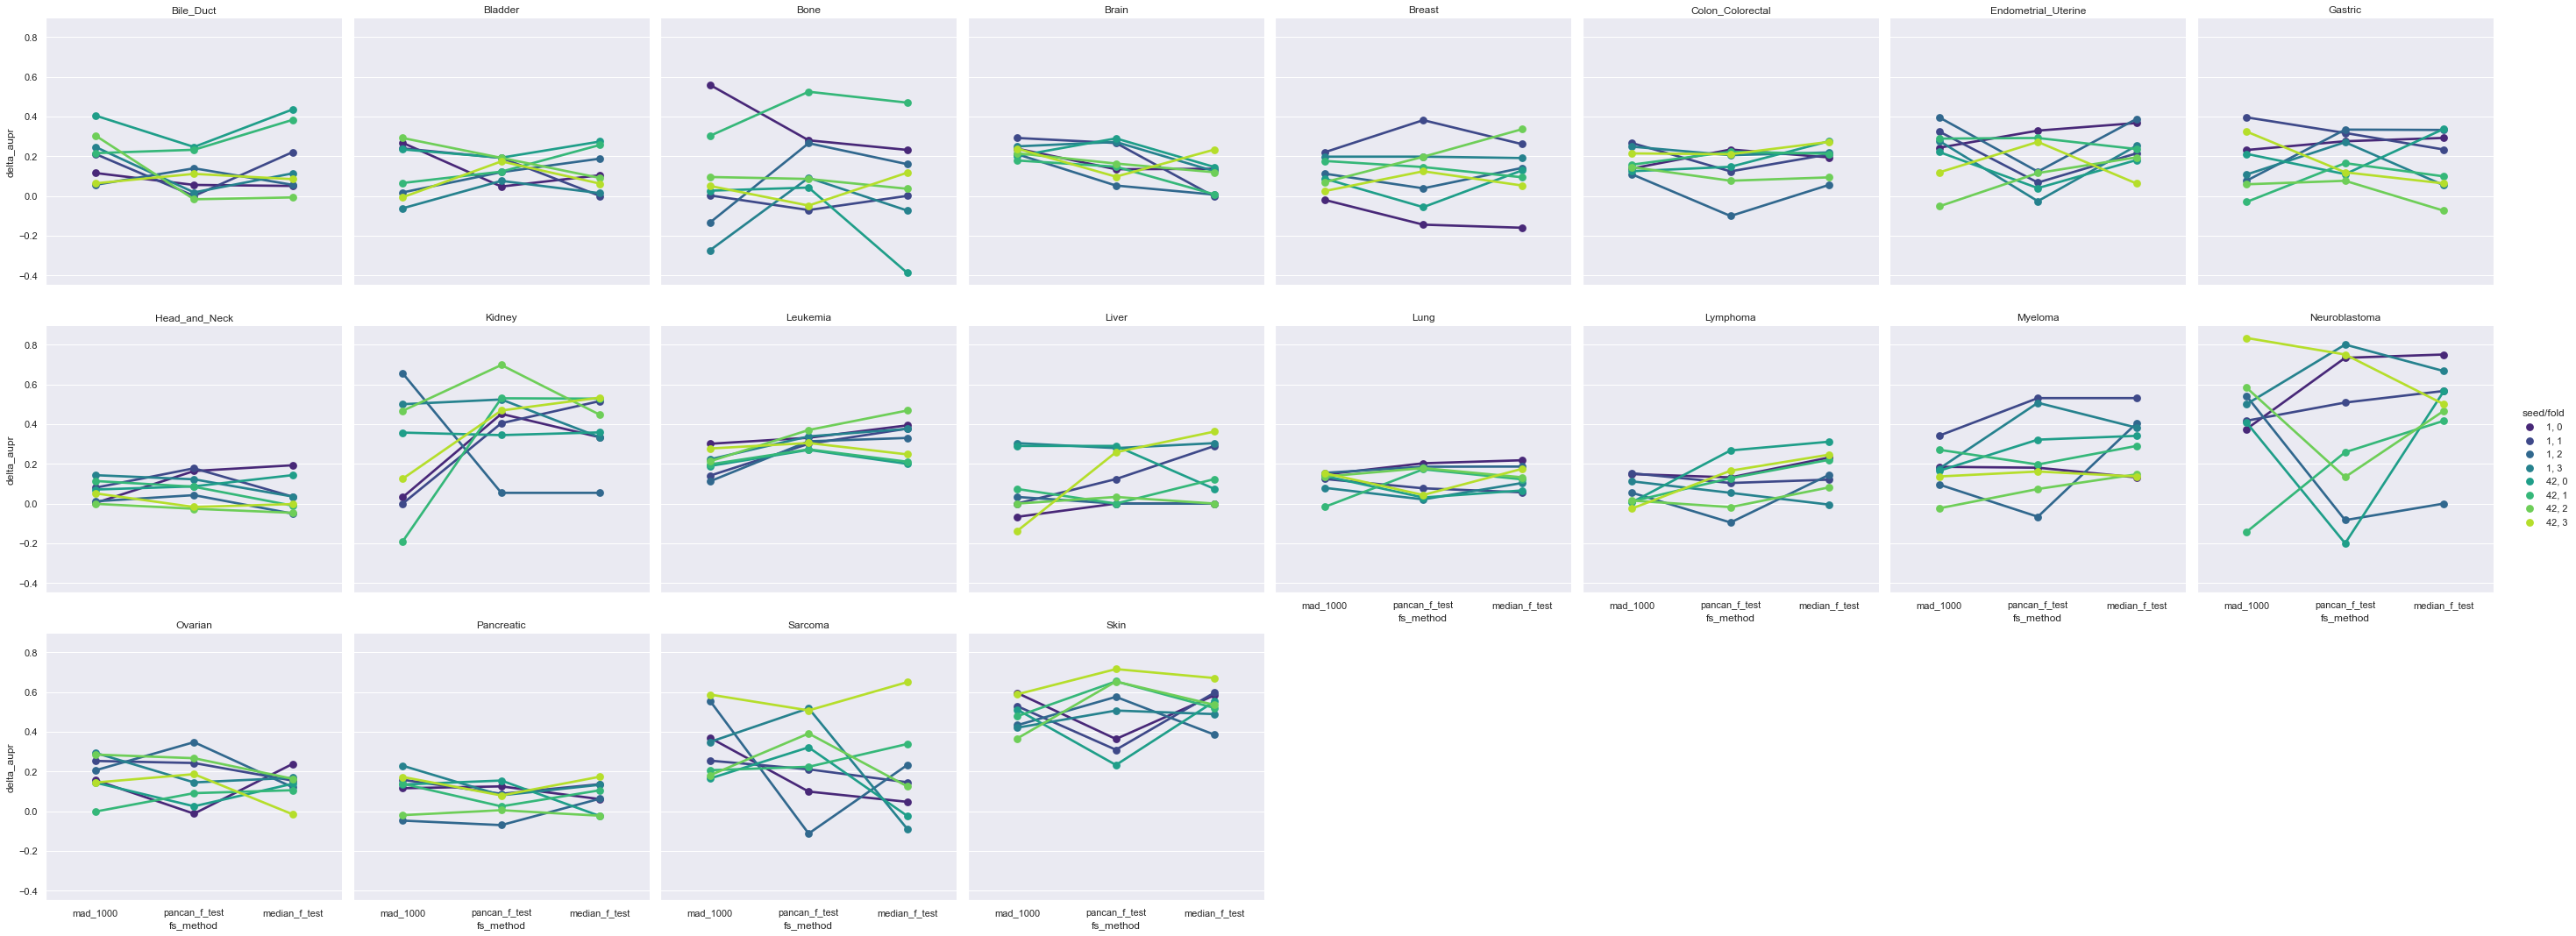

In [15]:
sns.set({'figure.figsize': (15, 6)})
sns.set_context('notebook')

plot_fs_methods = [
    'mad_1000',
    'pancan_f_test',
    'median_f_test'
]

plot_df = (
    pancancer_only_compare_df[
        (pancancer_only_compare_df.identifier == gene) &
        (pancancer_only_compare_df.fs_method.isin(plot_fs_methods))
    ].sort_values(by='holdout_cancer_type')
).sort_values(by=['seed', 'fold'])
plot_df['seed/fold'] = plot_df.seed.astype(str) + ', ' + plot_df.fold.astype(str)

g = sns.catplot(
    data=plot_df, x='fs_method', y=delta_metric, col='holdout_cancer_type',
    hue='seed/fold', kind='point', col_wrap=8, order=plot_fs_methods,
    palette='viridis'
)
g.set_titles(col_template='{col_name}')

if output_plots:
    plt.savefig(output_plots_dir / '{}_by_cancer_type_lines.png'.format(gene),
                dpi=200, bbox_inches='tight')

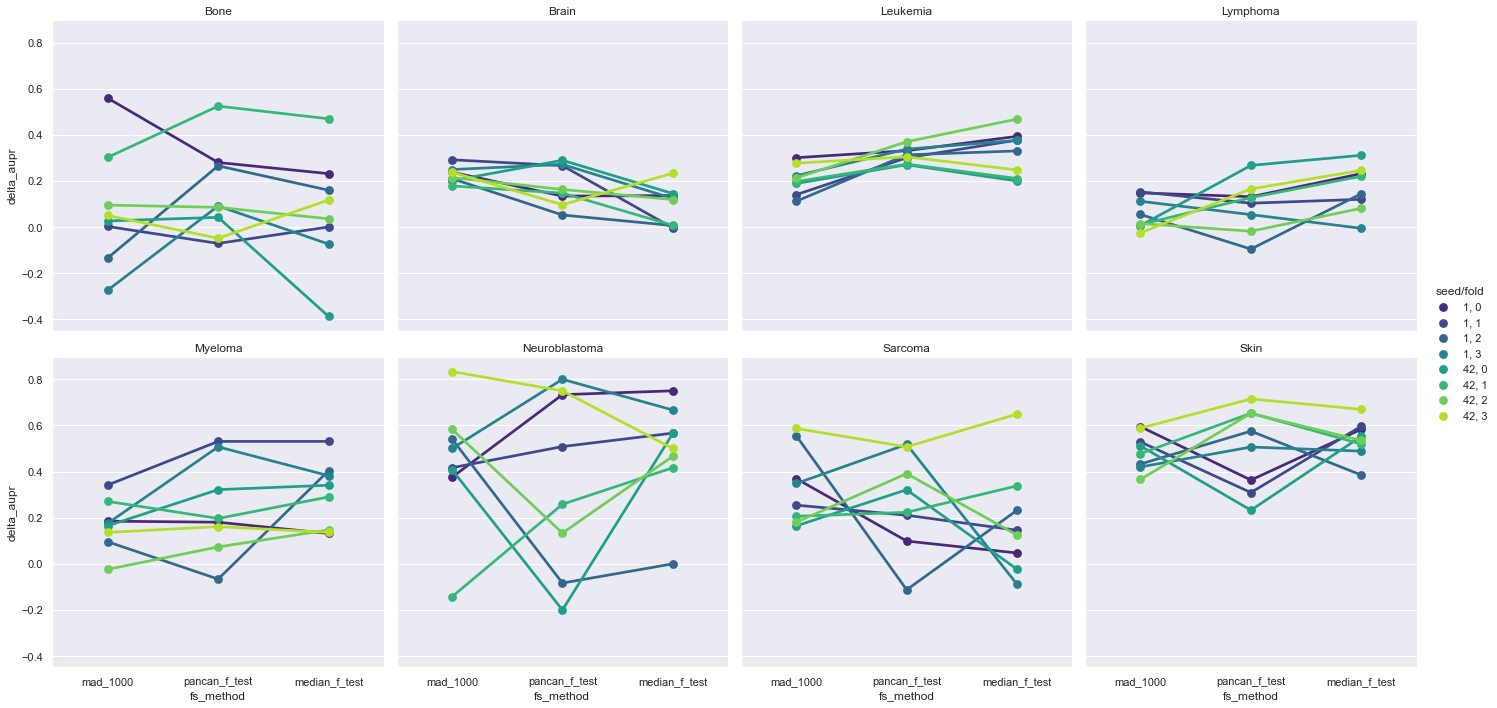

In [16]:
sns.set({'figure.figsize': (15, 6)})
sns.set_context('notebook')

plot_fs_methods = [
    'mad_1000',
    'pancan_f_test',
    'median_f_test'
]

plot_df = (
    pancancer_only_compare_df[
        (pancancer_only_compare_df.identifier == gene) &
        (pancancer_only_compare_df.holdout_cancer_type.isin(non_carcinomas)) &
        (pancancer_only_compare_df.fs_method.isin(plot_fs_methods))
    ].sort_values(by='holdout_cancer_type')
).sort_values(by=['seed', 'fold'])
plot_df['seed/fold'] = plot_df.seed.astype(str) + ', ' + plot_df.fold.astype(str)

g = sns.catplot(
    data=plot_df, x='fs_method', y=delta_metric, col='holdout_cancer_type',
    hue='seed/fold', kind='point', col_wrap=4, order=plot_fs_methods,
    palette='viridis'
)
g.set_titles(col_template='{col_name}')

if output_plots:
    plt.savefig(output_plots_dir / '{}_non_carcinoma_by_cancer_type_lines.png'.format(gene),
                dpi=200, bbox_inches='tight')

TODO: interpretation